Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024a/10kev无磁场/distfun0035.sdf
t() = time
x(1501, 1001, 1001) = grid
y(1501, 1001, 1001) = grid
z(1501, 1001, 1001) = grid
xc(1500, 1000, 1000) = grid_mid
yc(1500, 1000, 1000) = grid_mid
zc(1500, 1000, 1000) = grid_mid
Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 1,  7, 20]
Grid_CPUs_Original_rank <class 'sdf.BlockPlainMesh'> [ 2,  8, 21]
Grid_CPUs_Original_rank_mid <class 'sdf.BlockPlainMesh'> [ 1,  7, 20]
Grid_Grid <class 'sdf.BlockPlainMesh'> [1501, 1001, 1001]
Grid_Grid_mid <class 'sdf.BlockPlainMesh'> [1500, 1000, 1000]
Grid_allenergy0_Electron <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy0_Electron_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy0_Photon <class 'sdf.

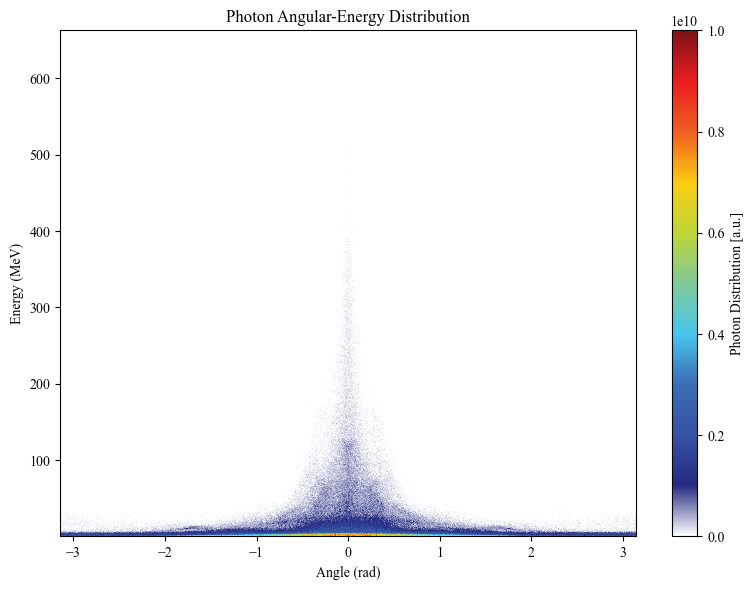

In [15]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os

# ========= 1. 路径与文件设置 =========
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024a/10kev无磁场'
file_prefix = 'distfun'
file_suffix = '.sdf'
file_index = 35
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# ========= 2. 读取 SDF 数据 =========
Data = sh.getdata(file_path)
sh.list_variables(Data)

# ========= 3. 获取能量与角度数据 =========
energy_mev = Data.Grid_en_anglexy_Electron.data[0] / 1.6e-13  # eV -> MeV
angle_rad = Data.Grid_en_anglexy_Electron.data[1]             # 角度单位为弧度

# ========= 4. 设置范围与分辨率 =========
# energy_range = (0, 70)  # MeV
# angle_range = (-np.pi, np.pi)  # rad

# dE = (energy_range[1] - energy_range[0]) / len(energy_mev)
# dA = (angle_range[1] - angle_range[0]) / len(angle_rad)

dE = np.mean(np.diff(energy_mev))  # 合并后bin宽度平均值
dA = np.mean(np.diff(angle_rad))  # 合并后bin宽度平均值


# ========= 5. 获取分布函数并归一化 =========
dist_fn = Data.dist_fn_en_anglexy_Electron.data / (dE * dA)

# ========= 6. 自定义颜色映射 =========
color_list = [
    (255/255, 255/255, 255/255),  # 白色
    (37/255, 43/255, 128/255),    # 深蓝色
    (55/255, 82/255, 164/255),    # 蓝色
    (60/255, 109/255, 180/255),   # 浅蓝色
    (72/255, 198/255, 235/255),   # 青色
    (129/255, 201/255, 152/255),  # 绿色
    (189/255, 214/255, 56/255),   # 黄绿色
    (251/255, 205/255, 17/255),   # 黄色
    (239/255, 94/255, 33/255),    # 橙色
    (235/255, 29/255, 34/255),    # 红色
    (125/255, 19/255, 21/255)     # 深红色
]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", color_list, N=256)

# ========= 7. 构建网格 =========
angle_grid, energy_grid = np.meshgrid(angle_rad, energy_mev)#, indexing='ij')  # 保留弧度单位

# ========= 8. 绘图 =========
fig, ax = plt.subplots(figsize=(8, 6))

pcm = ax.pcolormesh(angle_grid, energy_grid, dist_fn, shading='auto',
                    cmap=custom_cmap, vmax=1e10) #, vmax=1e10

# ========= 9. 图形设置 =========
fig.colorbar(pcm, ax=ax, label='Photon Distribution [a.u.]')
ax.set_xlabel('Angle (rad)')
ax.set_ylabel('Energy (MeV)')
ax.set_title('Photon Angular-Energy Distribution')

plt.tight_layout()

# ax.set_xlim(-0.75,0.75)
# ax.set_ylim(0,5)
plt.show()


Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 3,  1, 50]
Grid_CPUs_Original_rank <class 'sdf.BlockPlainMesh'> [ 4,  2, 51]
Grid_CPUs_Original_rank_mid <class 'sdf.BlockPlainMesh'> [ 3,  1, 50]
Grid_Grid <class 'sdf.BlockPlainMesh'> [1501, 1001, 1001]
Grid_Grid_mid <class 'sdf.BlockPlainMesh'> [1500, 1000, 1000]
Grid_allenergy0_Electron <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy0_Electron_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy0_Photon <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy0_Photon_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy_Electron <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy_Electron_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy_Photon <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy_Photon_mid <class

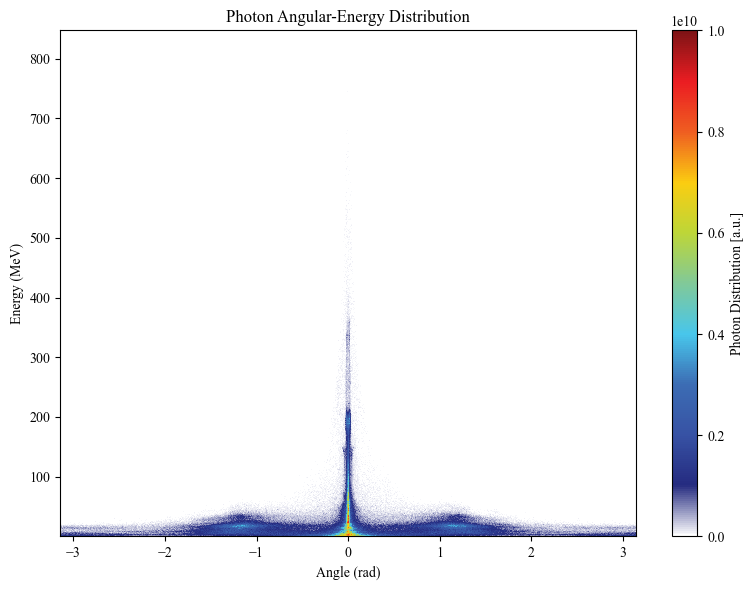

In [14]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os

# ========= 1. 路径与文件设置 =========
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024ab+2/10kev25磁场'
file_prefix = 'distfun'
file_suffix = '.sdf'
file_index = 35
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# ========= 2. 读取 SDF 数据 =========
Data = sh.getdata(file_path)
sh.list_variables(Data)

# ========= 3. 获取能量与角度数据 =========
energy_mev = Data.Grid_en_anglexy_Electron.data[0] / 1.6e-13  # eV -> MeV
angle_rad = Data.Grid_en_anglexy_Electron.data[1]             # 角度单位为弧度

# ========= 4. 设置范围与分辨率 =========
# energy_range = (0, 70)  # MeV
# angle_range = (-np.pi, np.pi)  # rad

# dE = (energy_range[1] - energy_range[0]) / len(energy_mev)
# dA = (angle_range[1] - angle_range[0]) / len(angle_rad)

dE = np.mean(np.diff(energy_mev))  # 合并后bin宽度平均值
dA = np.mean(np.diff(angle_rad))  # 合并后bin宽度平均值


# ========= 5. 获取分布函数并归一化 =========
dist_fn = Data.dist_fn_en_anglexy_Electron.data / (dE * dA)

# ========= 6. 自定义颜色映射 =========
color_list = [
    (255/255, 255/255, 255/255),  # 白色
    (37/255, 43/255, 128/255),    # 深蓝色
    (55/255, 82/255, 164/255),    # 蓝色
    (60/255, 109/255, 180/255),   # 浅蓝色
    (72/255, 198/255, 235/255),   # 青色
    (129/255, 201/255, 152/255),  # 绿色
    (189/255, 214/255, 56/255),   # 黄绿色
    (251/255, 205/255, 17/255),   # 黄色
    (239/255, 94/255, 33/255),    # 橙色
    (235/255, 29/255, 34/255),    # 红色
    (125/255, 19/255, 21/255)     # 深红色
]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", color_list, N=256)

# ========= 7. 构建网格 =========
angle_grid, energy_grid = np.meshgrid(angle_rad, energy_mev)#, indexing='ij')  # 保留弧度单位

# ========= 8. 绘图 =========
fig, ax = plt.subplots(figsize=(8, 6))

pcm = ax.pcolormesh(angle_grid, energy_grid, dist_fn, shading='auto',
                    cmap=custom_cmap, vmax=1e10) #, vmax=1e10

# ========= 9. 图形设置 =========
fig.colorbar(pcm, ax=ax, label='Photon Distribution [a.u.]')
ax.set_xlabel('Angle (rad)')
ax.set_ylabel('Energy (MeV)')
ax.set_title('Photon Angular-Energy Distribution')

plt.tight_layout()

# ax.set_xlim(-0.75,0.75)
# ax.set_ylim(0,5)

plt.show()
